<a href="https://colab.research.google.com/github/tkeldenich/First_Project_with_Keras_DeepLearning/blob/main/First_Project_Keras_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First Project in Python with Keras – Easy Deep Learning**

*   [English Article](https://inside-machinelearning.com/en/first-projec-keras/)
*   [French Article](https://inside-machinelearning.com/premier-projet-keras/)

If you are new to Deep Learning, this article is for you! Your first Python project with Keras awaits you.

Any beginner in Deep Learning must know Keras.

It is a simple and easy to access library to create your first Neural Networks.

Keras is part of a larger library: TensorFlow.

**By learning how to use Keras you will also learn how to use TensorFlow which will give you the basis to reach a more advanced level.**

Let’s start now this first project with Keras!

## **First Step**

### **Data**

A Deep Learning project is not only done with Keras.

Here we’ll use the Pandas library to load our data. First, let’s import it:

In [ ]:
import pandas as pd

Now we can load our dataset.

For this project we will use the pima-indian-diabete dataset.

This dataset comes from the National Institute of Diabetes and Digestive and Kidney Diseases.

**The objective of this project is to predict if a patient is diabetic or not, based on diagnostic measures included in the dataset.**

You can download the dataset on [this Github](https://github.com/tkeldenich/First_Project_with_Keras_DeepLearning).

Once you have it, put it in your code environment (Notebook or folder) and load it with the read_csv function. You can then display it with the head function:

In [ ]:
df = pd.read_csv('pima-indian-diabetes.csv') 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DiabetesPresence
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We now have our CSV file loaded in a Pandas DataFrame. This DataFrame allows us to easily manipulate our data.

You can see that there are nine columns in total:

- Pregnancies
- Glucose
- Blood Pressure
- Skin Thickness
- Insulin
- BMI
- Diabetes Pedigree Function
- Age
- Diabetes Presence

Our second step is to extract the X and Y data. Our features and target.

> Features are the data that will allow us to predict our target.

In our case, we want to use the diagnostic data of each patient to predict the presence of diabetes (`DiabetesPresence`).

In [ ]:
X = df.loc[:, df.columns != 'DiabetesPresence']
Y = df.loc[:, 'DiabetesPresence']

X contains the whole dataset except the column DiabetesPresence. Y contains only the column DiabetesPresence.

In the column `DiabetesPresence` :

- 1 indicates the presence of Diabetes
- 0 indicates the absence of Diabetes.

### **Deep Learning**

Our data is now ready to be used.

We can finally see what Keras is all about!

**Here we import two functions:**

- Sequential to initialize our model
- Dense to add Dense layers to our model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

We can now use these functions.

First of all we initialize the model. Then we add layers to it:

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Here the model is quite simple. It has 4 layers:

- Input + Hidden layer: model.add(Dense(12, input_shape=(8,), activation=’relu’))
- Hidden: model.add(Dense(8, activation=’relu’))
- Output: model.add(Dense(1, activation=’sigmoid’))

> Notice that the first layer has in fact two layers.

Indeed the first layer has an input layer indicated by the input_shape of 8. And a hidden layer Dense, in which we indicate the dimension 12 and the activation function relu (more information on these functions at the end of the article).

**For the input and output layers, we must indicate the size of our dataset. In our case, the features have 8 columns. We indicate 8 in the input layer. The target has only one column. Then we indicate 1 in the output layer.**

So our Deep Learning model will take as input our features and will give us as output a prediction of our target.

Then, we can compile our model: we indicate to our model the loss function, the optimizer and the metric to use.

*These are concepts that we will not cover in this tutorial. But keep in mind that these functions are the icing on the cake that allows us to train our Deep Learning model.*

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Finally, we can train our model.

### **Training**

During training, the model will iterate several times on our data. It tries predictions and compares them to the results it should predict. Then it adjusts its weights thanks to the functions defined during the compilation.

These iterations are called epochs. When `epochs=100`, the model will iterate 100 times on the complete dataset.

In [ ]:
model.fit(X, Y, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 3.6226 - accuracy: 0.4727
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 2.1144 - accuracy: 0.5768
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.4636 - accuracy: 0.5938
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0403 - accuracy: 0.6107
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8284 - accuracy: 0.6263
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7189 - accuracy: 0.6367
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6484
Epoch 8/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6731 - accuracy: 0.6445
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.6523
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.6510
Epoch 11/

The model is now trained!

We can then evaluate its performance on our data. To do so, we use the `evaluate` function.

In [ ]:
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.6562
Accuracy: 65.62


Our model has an accuracy of 73.83%. This is not bad but…

…it does not represent the real accuracy of our model.
**texte en gras**
Indeed, in Deep Learning, we want to train an Artificial Intelligence model to be efficient in any situation.

If we evaluate our model with the data on which it has been trained, it will necessarily perform better than on data it has never seen.

**And this is precisely what we are interested in. To know if our Deep Learning model is able to use its knowledge on data it has never seen. If it can, we say that the model is able to generalize.**

In the first part of this article, we used a single dataset for training and evaluating our data. But in reality, a real project isn’t done this way.

Actually this part allowed us to validate that we can:

- use our data
- solve our problem with a Deep Learning model

To go further, I propose you the second part of this article.

There, we’ll see how to validate that our model is able to generalize.

## **Going further**

### **Data**

Our dataset contains 789 rows. In other words, we have the medical data of 789 patients.

As we saw in the first part, we need several types of data: one to train our model and the other to evaluate its performance.

These data have a name:

- Training data: `df_train`
- Test data: `df_test`
Problem? We have only one dataset.

Therefore we will create these two datasets ourselves from our CSV.

A large part of this dataset will be used for training and a smaller part for evaluation.

**We’ll take 80% of this data to train our model and 20% to evaluate it.**

Fortunately Pandas allows us to do this easily:

In [ ]:
df_train = df.sample(frac=0.8)
df_test = df.drop(df_train.index)

First, we take randomly in our dataset 80% of the rows.

Then, we take the remaining rows for evaluation data.

We can display our training data to verify that our data is randomly picked:

In [ ]:
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DiabetesPresence
6,3,78,50,32,88,31.0,0.248,26,1
467,0,97,64,36,100,36.8,0.600,25,0
101,1,151,60,0,0,26.1,0.179,22,0
387,8,105,100,36,0,43.3,0.239,45,1
438,1,97,70,15,0,18.2,0.147,21,0


We can see that the indexes on the very left column do not follow each other. This indicates that the dataset has been shuffled before picking df_train.

But why randomly select or data?

It allows us to make sure that the separation performed is not biased. Indeed, the dataset as we have it can be sorted beforehand without us being aware of it.

If for example the patients with diabetes were present only at the beginning, and the patients without diabetes only at the end. This would give us training data containing only diabetics. Not ideal if our Deep Learning model has to learn to generalize.

> To be able to generalize, our model must train on disparate data.

Therefore I invite you to check your dataset before performing any operation on it.

**A good practice is to always do a random separation to make sure you don’t end up with biased data.**

From this new data, we can create the X features and Y target. The process is the same as in the first part:

In [ ]:
X_train = df_train.loc[:, df.columns != 'DiabetesPresence']
Y_train = df_train.loc[:, 'DiabetesPresence']
X_test = df_test.loc[:, df.columns != 'DiabetesPresence']
Y_test = df_test.loc[:, 'DiabetesPresence']

**Model**

Let’s take the structure of our previous Deep Learning model:

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

We can now display its diagram to understand in more detail the Neural Network we’ve just created.

The diagram of a Neural Network allows us to better understand its structure. To do this we use the `plot_model` function:

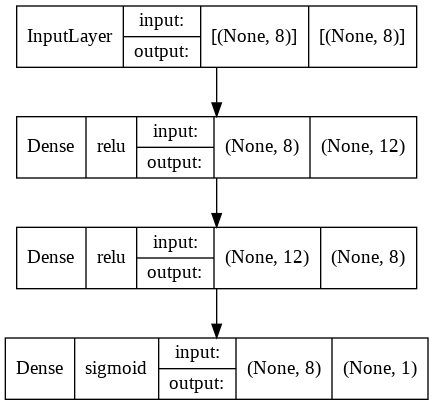

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=False, show_layer_activations=True)

The diagram allows us to visualize the four layers of our Neural Network, their activation function, their input and their output.

For example, our third layer has a `relu` activation function and has 12 neurons as input and 8 as output.

Now let’s compile our model:

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Finally, let’s move on to the most important part: the training.

**Here we will make some changes regarding to the previous code.**

First of all let’s add the `validation_split` this parameter will separate our training data in 2 sub-datasets:

- training data
- validation data

*Note: validation data is not the same as evaluation data. Validation allows us to validate performance as we train. Evaluation is used to assess the model at the end of the training.*

**These concepts will become clearer throughout this article.**

We also indicate that we want to recover the history of the training. This will allow us to analyze our model in more detail. To do this we indicate `history =` at the beginning of the line.

Let’s start the training:

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=10)

Epoch 1/50
50/50 [==============================] - 1s 6ms/step - loss: 3.5232 - accuracy: 0.5682 - val_loss: 1.8448 - val_accuracy: 0.5935
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 1.4388 - accuracy: 0.6497 - val_loss: 1.6078 - val_accuracy: 0.6016
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 1.2592 - accuracy: 0.6273 - val_loss: 1.4638 - val_accuracy: 0.5935
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 1.1423 - accuracy: 0.6619 - val_loss: 1.3112 - val_accuracy: 0.5772
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 1.0667 - accuracy: 0.6395 - val_loss: 1.3087 - val_accuracy: 0.5772
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.9412 - accuracy: 0.6741 - val_loss: 1.1680 - val_accuracy: 0.5854
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.9176 - accuracy: 0.6599 - val_loss: 1.1191 - val_accuracy: 0.6098
Epoch 8/50
50/50 [==

### **Analysis**

Once the training is finished, we can visually analyze what happened during this process.

For this we use the Matplotlib library:

In [ ]:
from matplotlib import pyplot as plt

Our `history` variable has recorded all the information about the model training.

At each epoch the model :

- makes predictions on training AND validation data
- compares its predictions on training AND validation data with the expected result
- changes its weights according to its performance on training data ONLY

The validation data are solely present to validate the results of the model on external data. Those on which it does not train.

In fact, this allows to counter what is called overfitting.

> Overfitting occurs when the model specializes too much on the training data.

**It then performs well on training data but fails to predict good results on the other data.**

The validation data are used to check that this does not happen.

Let’s display the results:

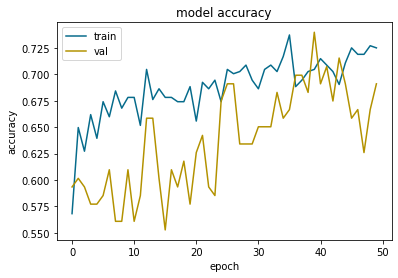

In [ ]:
plt.plot(history.history['accuracy'], color='#066b8b')
plt.plot(history.history['val_accuracy'], color='#b39200')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In blue the results on training data. In orange the results on validation data.

If the orange curve follows the blue curve the training is well done. When the model increases its performance on the training data, it also increases its performance on the validation data. This indicates that the model generalizes well.

Visually we can see the overfitting when the validation curve deviates from the training curve. Here we can see that it starts to deviate from epoch 45 to come back on the right path at epoch 50.

**Keep in mind that there will always be a gap between the results of the training curve and those of the validation curve. This is because the model is trained explicitly on the training data. It therefore performs better in this context.**

Our goal is to keep this gap as small as possible and keep the curves in line.

At epoch 50, the accuracy gap between the training and validation data is less than 0.5. This is considered acceptable.

If this wasn’t the case, we would have had to rerun the training with other parameters.

### **Predictions**

**Now how to make predictions on new data?**

We can reuse our model to make it predict the presence of diabetes on new data. For that nothing is easier, we use the `predict``
 function:

In [ ]:
predictions = model.predict(X_test)

We get an array of predictions.

Let’s display the first element:

In [ ]:
predictions[0]

array([0.7407335], dtype=float32)

Here we get neither 1 nor 0 but a decimal 0.74. In fact it is a probability.

**We can establish this rule: if the probability is above 50%, there is diabetes otherwise there is no diabetes.**

Let’s modify the result of these predictions to have only 0 and 1:

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype(int)

Now, instead of having probabilities we have 0’s and 1’s representing the presence of diabetes according to the rule established above.

We can display the first predictions and compare them to the expected results:

In [ ]:
for i in range(5):
	print('%s => Predicted : %d,  Expected : %d' % (X_test.iloc[i].tolist(), predictions[i], Y_test.iloc[i]))

[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => Predicted : 1,  Expected : 1
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => Predicted : 1,  Expected : 0
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => Predicted : 1,  Expected : 1
[1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0] => Predicted : 1,  Expected : 1
[7.0, 107.0, 74.0, 0.0, 0.0, 29.6, 0.254, 31.0] => Predicted : 0,  Expected : 1


**The model makes good predictions on most of the cases.**

We could continue to evaluate line by line each prediction of our model.

But we will prefer the function included in Keras evaluate to determine its performance:

In [ ]:
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.5607 - accuracy: 0.7273
Accuracy: 72.73


The result is quite good. We are very close to the value obtained in the first part of 73.83. This indicates that the model succeeds in generalizing.

## **To conclude**

You have developed your first Neural Network with Keras and with an impressive prediction of 72%!

> Will you be able to exceed this result?

To do so, several techniques are offered to you:

- Add layers
- Modify [the activation functions](https://inside-machinelearning.com/en/activation-function-how-does-it-work-a-simple-explanation/)
- Use other functions at compile time
- Modify the training parameters of the model

And keep in mind to ensure that your model is not overfitting!

If you want to continue learning, our article on activation functions is waiting for you here: [Activation function, how does it work ? – A simple explanation.](https://inside-machinelearning.com/en/activation-function-how-does-it-work-a-simple-explanation/)